# Homework 2: Monte Carlo simulation of sodium incorporation in ferropericlase (Mg,Fe)O in the lower mantle under high pressure conditions

## Initial implementation
### by Luisa Chavarria

## Contents
- [Objective](#objective)
- [Instructions](#instructions)
- [1. Import modules and libraries](#1-import-modules-and-libraries)
- [2. Set parameters for the simulation](#2-set-parameters-for-the-simulation)
- [3. Create the initial lattice](#3-create-the-initial-lattice)
- [4. Calculate the energy](#4-calculate-the-energy)
- [5. Map of the distribution of energies](#5-map-of-the-distribution-of-energies)
- [6. Analysis of results](#6-analysis-of-results)


## Objective

This project looks to simulate sodium incorporation into (Mg,Fe)O at lower mantle conditions. The initial implementation will simulate the conditions at ambient temperature T= 300 K and ambient pressure P= 0 GPa. As well, the system was initially symplified to test how the energy of MgO and FeO changes when sodium is incorporated.

The Homework 2 focuses on creating a structured approach of the project, understanding the data/problem space, establishing testing methods, and implementing core functionality.


## Instructions

This notebook integrates the modules developed for lattice creationg, electrostatic interaction calculations, Monte Carlo visualization, and data visualization.



## 1. Import modules and libraries

In [61]:
## 1. Import Required Libraries and Modules

# Libraries

import numpy as np
import math 
import matplotlib.pyplot as plt

# Modules

from lattice import create_lattice
from energy_calculation_2 import energy_change


## 2. Set parameters for the simulation

Define the simulation parameters

In [62]:

material = 'MgO'        # Can be 'MgO' or 'FeO'
lattice_size = 5      # Lattice size (5x5x5)
num_na_ions = 5        # Number of Na⁺ ions to be inserted
temperature = 300       # Temperature in Kelvin
num_simulations = 10     # Number of simulations to run
steps = 1000            # Number of Monte Carlo steps

k_e = 8.99e9  # Coulomb's constant in N·m²/C²
r_Mg = 72e-12  # Ionic radius of Mg2+ in meters
r_Fe = 78e-12  # Ionic radius of Fe2+ in meters
r_Na = 102e-12  # Ionic radius of Na+ in meters
r_O = 140e-12  # Ionic radius of O2- in meters
k_B = 1.38e-23  # Boltzmann constant in J/K


## 3. Create the initial lattice

Use the create_lattice function to generate the lattice for the selected material (MgO or FeO)

This module generates a 3D lattice representing MgO or FeO. Both of them have a cubic structure or also named rocksalt similar to NaCl. It is one of the simplest crystal structures and can be a model for cation substitution. 
Each Mg2+ or Fe2+ ion have an octahedral coordination. This means that they are surrounded by 6 O2- ions

Use the function create_lattice of the module lattice.py to generate the 3D lattice. For this example, I'm using a cell with a dimenssion of 5x5x5. Some authors like 
Vinograd et al., (2006) used a supercell with a 3x3x3 configuration. For the initial implementation, a larger cell can give more information about the energy distribution when
sodium is incorporated inside the structure. 

This function takes the variables material and lattice size
Material can be MgO or FeO. For future implementations, I want to include different proportions of Fe inside the cell. 


In [69]:
# Create the lattice for the chosen material

lattice = create_lattice(material=material, L=lattice_size)

lattice  # The output is an array with the structure of the 5X5X5 cell

array([[[0, 1, 0, 1, 0],
        [1, 0, 1, 0, 1],
        [0, 1, 0, 1, 0],
        [1, 0, 1, 0, 1],
        [0, 1, 0, 1, 0]],

       [[1, 0, 1, 0, 1],
        [0, 1, 0, 1, 0],
        [1, 0, 1, 0, 1],
        [0, 1, 0, 1, 0],
        [1, 0, 1, 0, 1]],

       [[0, 1, 0, 1, 0],
        [1, 0, 1, 0, 1],
        [0, 1, 0, 1, 0],
        [1, 0, 1, 0, 1],
        [0, 1, 0, 1, 0]],

       [[1, 0, 1, 0, 1],
        [0, 1, 0, 1, 0],
        [1, 0, 1, 0, 1],
        [0, 1, 0, 1, 0],
        [1, 0, 1, 0, 1]],

       [[0, 1, 0, 1, 0],
        [1, 0, 1, 0, 1],
        [0, 1, 0, 1, 0],
        [1, 0, 1, 0, 1],
        [0, 1, 0, 1, 0]]])

## 4. Calculate the energy 

This module calculates the Coulombic interactions between ions using Coulomb's law. 

The Coulomb's law calculates the amount of force between two charged particles. The closer two charges are, the stronger the force between them. 


$$E_{\text{Coulomb}} = \frac{k_e \cdot Q_1 \cdot Q_2}{r^2}$$

where ke is Coulomb's constant (8.99e9 N*m^2/C^2), Q1 and Q2 are the charges of the interacting ions, and r is the distance between them.

Use the file energy_calculation_2.py to access the function energy_change. This function calculate the electrostatic interaction and estimate the change of energy based on the Coulombic energy between Na+ and its neighbors. The neighbors list contains the six nearest neighbors as it has an octahedral coordination in the 3D configuration. 

In the code, it is assumed that the atoms have a periodic arrange. 


In [64]:
#k_e = 8.99e9  # Coulomb's constant in N·m²/C²
#r_Mg =  20e-12   # Ionic radius of Mg2+ in meters 72e-12
#r_Fe = 20e-12  # Ionic radius of Fe2+ in meters  78e-12
#r_Na = 20e-12  # Ionic radius of Na+ in meters  102e-12
#r_O = 20-12  # Ionic radius of O2- in meters 140e-12
#k_B = 1.38e-23  # Boltzmann constant in J/K

i, j, k = 1, 1, 1 # Position of the Na+ cation 
target_ion = 'Mg' # Fe is also an option


energy = energy_change(i, j, k, lattice, target_ion)

# Print the result
print(f"The energy change due to Na+ insertion at ({i}, {j}, {k}) is: {energy} J")

The energy change due to Na+ insertion at (1, 1, 1) is: -107880000000.0 J


## 5. Map of the distribution of energies

This module looks to create visualizations of energies through maps. The code iterates in the lattice position and calculate the energy at each point and then plot the energy slice

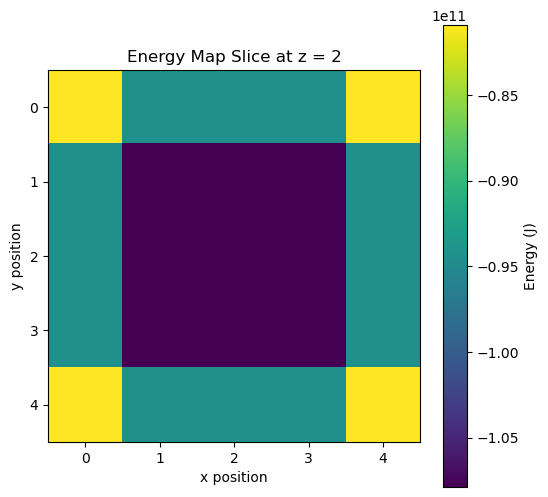

In [72]:
# Initialize an empty array to store the energy values for each lattice position
energy_map = np.zeros((lattice_size, lattice_size, lattice_size))

# Loop through all positions in the lattice to calculate the energy at each point
for i in range(lattice_size):
    for j in range(lattice_size):
        for k in range(lattice_size):
            energy_map[i, j, k] = energy_change(i, j, k, lattice, target_ion)

#Visualize the energy map

# Plotting a slice of the energy map 
slice_index = lattice_size //2   # Choose a central slice for visualization
energy_slice = energy_map[slice_index, :, :]  # Take a slice along one axis

# Plotting the energy slice
plt.figure(figsize=(6, 6))
plt.imshow(energy_slice, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Energy (J)')
plt.title(f"Energy Map Slice at z = {slice_index}")
plt.xlabel('x position')
plt.ylabel('y position')
plt.show()

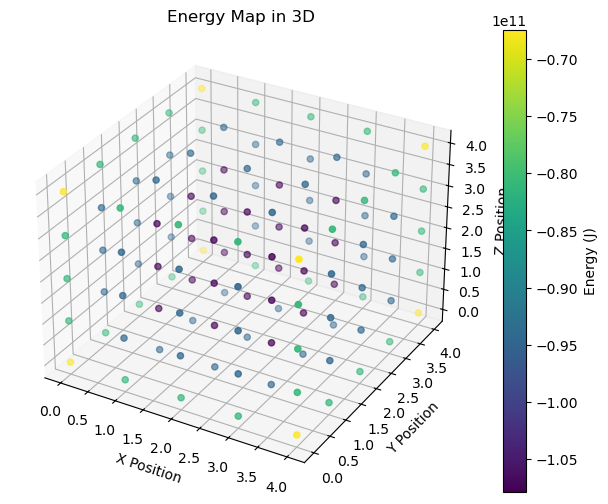

In [ ]:
# 3D plot that shows the distribution of energy at different positions in the 3D cell



from mpl_toolkits.mplot3d import Axes3D

# Get the x, y, z coordinates and energy values
x, y, z = np.indices((lattice_size, lattice_size, lattice_size))
energies = energy_map.flatten()

# Plotting in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x.flatten(), y.flatten(), z.flatten(), c=energies, cmap='viridis', s=20)
fig.colorbar(scatter, label='Energy (J)')
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Z Position')
ax.set_title('Energy Map in 3D')
plt.show()


## 7. Analysis of results

The plots show that the incorporation of sodium has the lowest energy in the positions close to the center of the cell. 

## 8. References and Sources

List any papers, books, websites, or other resources you've consulted or plan to use for your project. Use proper citation format.


1. Vinograd, V. L., Winkler, B., Wilson, D. J., Putnis, A., & Gale, J. D. (2006). Monte Carlo simulation of mixing in Ca3Fe2 Ge3O12-Ca4Ge4O12 garnets and implications for the thermodynamic stability of pyrope-majorite solid solution. Physics and Chemistry of Minerals, 33(8–9), 533–544. https://doi.org/10.1007/s00269-006-0099-5 (Example of Monte Carlo simulations)

Websites:


2. OpenAI. ChatGPT. February 11, 2025. OpenAI. https://chat.openai.com. (Planning and coding of the project)

